# Multi-Modal Data Fusion - Exercise 2: Common representational formats


## Learning goals

After this exercise, you should
  
- be able to implement PCA on your own and use it from sklearn
- be able to implement LDA algorithm
- be able to implement bootstrapping algorithm
- know how to apply (Gradient) Boosting algorithm for classification problem



## Relevant lecture

Lecture 3.

## Relevant chapters in course book

Chapter 4.

## Additional material

- Scikit-learn https://scikit-learn.org/stable/
- Pandas https://pandas.pydata.org/docs/
- numpy https://numpy.org/doc/stable/

# Assignments

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 1: Bootstrapping</b>

<p>Implement bootstrapping (see Lecture 3) to the function stub below. You may assume that D is the dataset given as Python list. M is the number of resamples drawn. The function should return MxN matrix where each row contains one bootstrapped sample. 
    
Use of numpy is recommended, especially size() and tile(). Try to use as few for loops as possible.</p>

</div>

In [1]:
from numpy import random as rd

def bootstrap(D,M):
    aux=[rd.choice(D,size=M,replace=True) for t in range(0,M)]
    return aux

Sample usage of the bootstrapping algorithm.

In [2]:
D = [1, 2, 3, 4, 5, 6, 7, 8, 9,10]
print(bootstrap(D,3))

[array([ 8,  7, 10]), array([ 4,  5, 10]), array([5, 1, 9])]


<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 2: PCA</b>

<p>Implement PCA algorithm as described in Lecture 3. Use data from pca_data.csv. Compute $\mu$ and $\Sigma$ as explained in lecture slides. Find eigenvalues and eigenvectors of $\Sigma$. Pick the first principal component which corresponds to largest eigenvalue. Plot the data and first principal component in same figure. The line depicting the first principal component should start from mean $\mu$ and end in $\mu\pm u_1$, where $u_1$ is the first principal component.</p>

</div>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('pca_data.csv',header=None)
means=np.mean(df.iloc[:,0:2])
sub=df.iloc[:,0:2]-means
print("Sub is:",sub)
square=np.cov(np.transpose(sub))
eigs,eigV=np.linalg.eig(square)


print("Means:",means)
print()
print("EIgenvalues:",eigs)
print("Eigenvectors",eigV)
print()


plt.plot(df.iloc[:,0],df.iloc[:,1],'bo')

maxPca=np.argmax(eigs)
print("THe component index:",maxPca)
component=eigV[:,maxPca]
print("The component:",component)
start=means
rightEnd=means+component
leftEnd=means-component
print("The right is ",rightEnd  )
print("The left is ",leftEnd  )

plt.plot([start[0],rightEnd[0]],[start[1],rightEnd[1]],c="red",linewidth=4)
plt.plot([start[0],leftEnd[0]],[start[1],leftEnd[1]],c="red",linewidth=4)

plt.show()


Sub is:            0         1
0   0.172690  0.184710
1   0.263759  0.386979
2  -0.515046 -0.638687
3   0.271343  0.380010
4  -0.009674  0.014757
5  -0.544493 -0.696874
6  -0.363535 -0.491676
7  -0.095152 -0.108973
8   0.315474  0.387856
9   0.322855  0.451143
10 -0.484420 -0.688235
11  0.328560  0.415806
12  0.315134  0.374903
13 -0.156658 -0.246479
14  0.158247  0.244306
15 -0.500147 -0.642819
16 -0.220272 -0.308954
17  0.273702  0.410292
18  0.150174  0.154685
19  0.317459  0.417248
Means: 0    0.642033
1    0.900708
dtype: float64

EIgenvalues: [0.00039878 0.29857288]
Eigenvectors [[-0.79766233 -0.60310431]
 [ 0.60310431 -0.79766233]]

THe component index: 1
The component: [-0.60310431 -0.79766233]
The right is  0    0.038929
1    0.103046
dtype: float64
The left is  0    1.245138
1    1.698370
dtype: float64


<Figure size 640x480 with 1 Axes>

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 3: PCA using sklearn</b>

<p>Consult documentation of sklearn on how to perform PCA using sklearn. Perform PCA using sklearn on same dataset as in Problem 2. Pick the model and train it (fit it) using same data as above. Do you get the same results? If not, what might be a reason for it?</p>

</div>

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df.iloc[:,0:2])

print(pca.explained_variance_)
print(pca.components_)
print(pca.singular_values_)

[0.29857288 0.00039878]
[[-0.60310431 -0.79766233]
 [-0.79766233  0.60310431]]
[2.38178183 0.08704513]


In [5]:
! They are the same in this case

/bin/sh: 1: They: not found


<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 4: LDA</b>

<p>Implement LDA algorithm as described in Lecture 3. Use data from lda_data.csv. The data consists of x coordinate, y coordinate and class label (0 or 1). Compute the quantities appearing in lecture slides. The LDA projection operator $U$ consists of single column which is the eigenvector of $H$ corresponding to the largest eigenvalue. Plot the data and the LDA subspace (line) in same figure. The line depicting the LDA subspace should start from mean $\mu_G$ and end in $\mu_G\pm u$, where $u$ is the direction of LDA subspace.</p>

</div>

In [6]:

print("Welcome to my cazan de tuica!")
# TODO here
df = pd.read_csv('lda_data.csv', header=None)
c1 = df.loc[df[2] == 0]
c2 = df.loc[df[2] == 1]

cov1 = np.cov(c1.iloc[:, 0:2], bias=True, rowvar=False)
cov2 = np.cov(c2.iloc[:, 0:2], bias=True, rowvar=False)
mean1 = np.mean(c1)
mean2 = np.mean(c2)
print("Sizes of c1 and c2",c1.shape,c2.shape)
mean1 = np.array([mean1[0], mean1[1]]).reshape(2,1)
mean2 = np.array([mean2[0], mean2[1]]).reshape(2,1)
print(mean1,mean2)
N = len(df)
mean_g = (1 / N) * (len(c1) * mean1 + len(c2) * mean2)

cov_W = (1 / N) * (len(c1) * cov1 + len(c2) * cov2)
cov_B = (1 / N) * (len(c1) * np.dot((mean1 - mean_g), np.transpose(mean_0 - mean_g)) + len(c2) * np.dot((mean2 - mean_g), np.transpose(mean2 - mean_g)))
print("cov_W shape",cov_W.shape)
print("cov_B shape",cov_B.shape)

H = np.dot(np.linalg.inv(cov_W), cov_B)
eigValues, eigVectors = np.linalg.eig(H)
print("EIgenvalues:",w)
print("Eigenvectors",v)
idx = eigValues.argsort()[::-1]
maxValue = eigValues[idx]
maxEigen = eigVectors[:, idx]
print("Max eigenvector",v)
p1 = mean_g + maxEigen[0].reshape(2,1)
p2 = mean_g - maxEigen[0].reshape(2,1)

plt.scatter(c1.iloc[:,0], cls_0.iloc[:,1])
plt.scatter(c2.iloc[:,0], c2.iloc[:,1])


plt.plot([mean_g[0], p1[0]], [mean_g[1], p2[1]], c='red')
plt.plot([mean_g[0], p2[0]], [mean_g[1], p1[1]], c='red')


Welcome to my cazan de tuica!
Sizes of c1 and c2 (8, 3) (9, 3)
[[0.28019462]
 [0.10823663]] [[1.29588889]
 [0.21094267]]


NameError: name 'mean_0' is not defined

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 5: Boosting</b>

<p>Use the tab-separated(!) file wifi_localization.txt. The data allows to determine indoor room location from wifi signal strenghts. Last column of the file contains class labels of rooms while the first seven columns contains signal strengths of mobile phones. Split the dataset into training (70%), validation (15%) and testing sets (15%). Train GradientBoostingClassifier from sklearn using n_estimators between 1-40. Consult documentation of sklearn (or Google) on how to do this. Compute the validation score on validation set using score(). Plot scores against n. Pick the value for n giving highest score and train the model using training data. For that n,  plot confusion matrix for testing set.</p>

</div>

(1400, 7)
(300, 7)
(300, 7)
Best n: 4


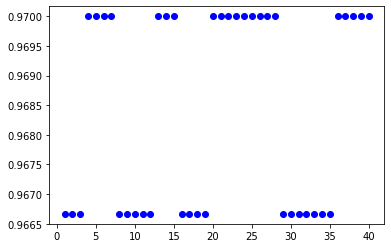

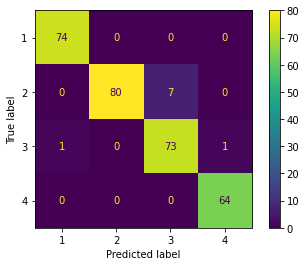

In [9]:
df = pd.read_csv('wifi_localization.txt',header=None,sep='\t')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
X=df.iloc[:,0:7]
y=df.iloc[:,7]
X_train, X_aux, y_train, y_aux = train_test_split(X,y,test_size=0.30,random_state=0)
X_validation,X_test,y_validation, y_test=train_test_split(X_aux,y_aux,test_size=0.50,random_state=0)
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)
bestEst=0
bestScore=0
for E in range(1,41):
    clf = GradientBoostingClassifier(random_state=0,n_estimators=E)
    clf.fit(X_train, y_train)
    CScore=clf.score(X_validation, y_validation)
    if(CScore>bestScore):
        bestScore=CScore
        bestEst=E
    plt.plot(E,CScore,'bo')
clf = GradientBoostingClassifier(random_state=0,n_estimators=bestEst)
clf.fit(X_train,y_train)
from sklearn import metrics
print("Best n:",bestEst)
# print(metrics.confusion_matrix(y_test,prediction))
metrics.plot_confusion_matrix(clf, X_test, y_test)
plt.show()
    
 